In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

# Load Dataset
# Replace with the Kaggle dataset path in your notebook environment
df = pd.read_csv('/content/drive/MyDrive/Battery_Data_Cleaned.csv')

df.head()


,type,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,-1,4,47,0,1,00001.csv,0.983689,0.054543,0.183130
1,0,24,47,1,2,00002.csv,0.983689,0.054543,0.183130
2,1,4,47,2,3,00003.csv,0.983689,0.054543,0.183130
3,0,24,47,3,4,00004.csv,0.983689,0.051825,0.152493
4,-1,4,47,4,5,00005.csv,0.925990,0.051825,0.152493


In [ ]:
# Drop non-numeric or unwanted columns
df = df.select_dtypes(include=[np.number]).dropna()

# Features & target
X = df.drop('Capacity', axis=1)
y = df['Capacity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 0.19658181479713693
R² Score: 0.41798339917192107


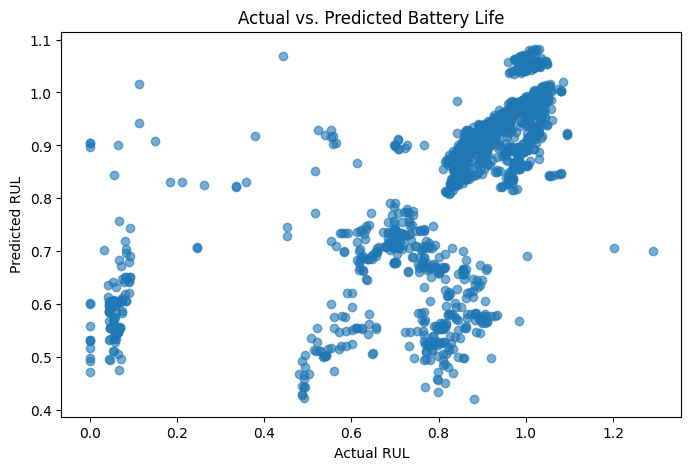

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs. Predicted Battery Life")
plt.show()
